In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bs = pd.read_csv("day.csv")

In [5]:
bs["dteday"] = pd.to_datetime(bs["dteday"])
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
bs["workingday"].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [9]:
bs.corr()["workingday"][["casual", "registered"]]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

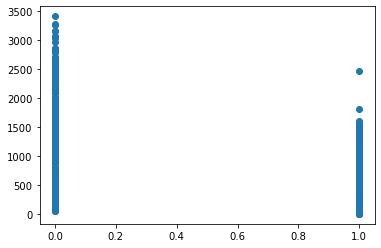

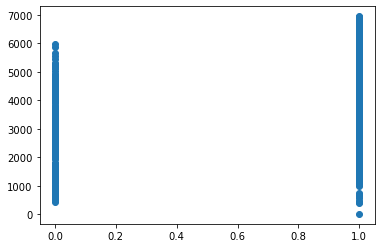

In [10]:
plt.scatter(bs["workingday"], bs["casual"])
plt.show()

plt.scatter(bs["workingday"], bs["registered"])
plt.show()

In [12]:
bs.groupby("workingday")[["casual", "registered"]].mean()

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


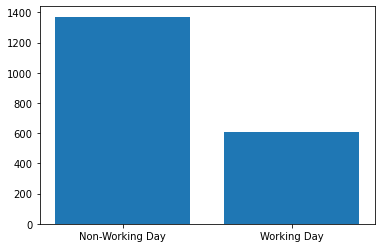

In [13]:
workingday = ["Non-Working Day", "Working Day"]
casual_avg = [1371, 607]

plt.bar(workingday, casual_avg)
plt.show()

In [14]:
bs["weekday"].value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In [17]:
weekday_avg = bs.groupby(["weekday"])[["casual", "registered"]].mean()

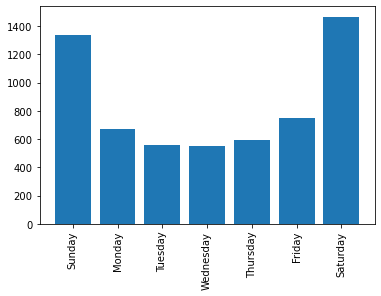

In [20]:
plt.bar(weekday_avg.index, weekday_avg["casual"])
plt.xticks(ticks = range(7), labels = ["Sunday", "Monday", "Tuesday",
                                       "Wednesday","Thursday", "Friday", "Saturday"],
           rotation = 90)
plt.show() # NDA -> Public

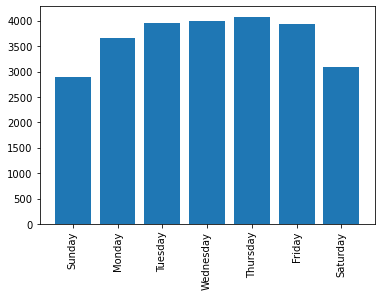

In [21]:
plt.bar(weekday_avg.index, weekday_avg["registered"])
plt.xticks(ticks = range(7), labels = ["Sunday", "Monday", "Tuesday",
                                       "Wednesday","Thursday", "Friday", "Saturday"],
           rotation = 90)
plt.show() # NDA -> Public

In [22]:
bs["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

We only see three unique values above, but, according to the documentation, the `weathersit` column has four unique values (`4` has a frequency of zero as a consequence):

-   `1`: clear or few clouds
-   `2`: mist or cloudy
-   `3`: light rain, light snow, thunderstorm
-   `4`: heavy rain, snow, ice pellets, fog

We call the number of times that a unique value occurs the **frequency**. And we call the output of `bike_sharing['weathersit'].value_counts()` a **frequency table**.

The best way to visualize a frequency table is by using a bar plot.

In [23]:
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
bs.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [28]:
bs["year"] = bs["dteday"].dt.year

In [33]:
bs.groupby(["year"])["weathersit"].value_counts(normalize = True)*100

year  weathersit
2011  1             61.917808
      2             33.972603
      3              4.109589
2012  1             64.754098
      2             33.606557
      3              1.639344
Name: weathersit, dtype: float64

In [46]:
# grouped = bs.groupby(["year"])

# grouped.get_group(2011)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,1,0,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162,2011
361,362,2011-12-28,1,0,12,0,3,1,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302,2011
362,363,2011-12-29,1,0,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423,2011
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999,2011


In [54]:
w = bs.groupby(["year"])["weathersit"].value_counts()
# type(w)
# pd.DataFrame(w)[(2011, 1):(2011, 3)].index 

w

year  weathersit
2011  1             226
      2             124
      3              15
2012  1             237
      2             123
      3               6
Name: weathersit, dtype: int64

In [59]:
w[2011].values

array([226, 124,  15], dtype=int64)

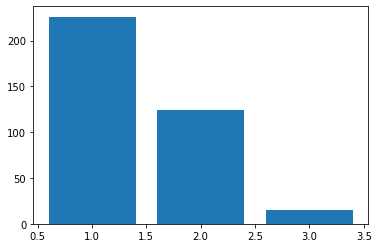

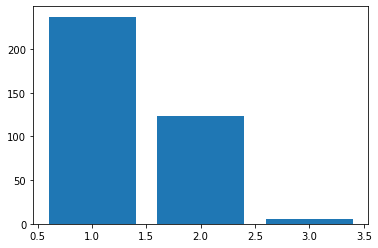

In [60]:
plt.bar(w[2011].index,w[2011].values)
plt.show()

plt.bar(w[2012].index,w[2012].values)
plt.show()

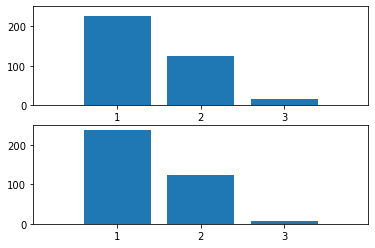

In [65]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(w[2011].index,w[2011].values)
ax1.set_xticks([1,2,3])
ax1.set_ylim(0,250)
ax1.set_xlim(0,4)

ax2.bar(w[2012].index,w[2012].values)
ax2.set_ylim(0,250)
ax2.set_xlim(0,4)
ax2.set_xticks([1,2,3])
plt.show()

Bar plots work especially well for visualizing frequency tables when the number of unique values is low.

If there are many unique values, then the bar plot looks too crowded, and it becomes more difficult to see any pattern.

Bar plots work well when generating the frequency tables for categorical columns. For numerical columns, we need to use a histogram.

In [66]:
bs["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5046    1
4713    1
4763    1
4785    1
2729    1
Name: cnt, Length: 696, dtype: int64

In [75]:
bs["cnt"].max()

8714

In [77]:
(8720-21)/10

869.9

In [73]:
bs["cnt"].value_counts(bins = 10).sort_index()

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64

In [79]:
# r = pd.interval_range(start = 21,end = 8720,freq = 870)
# pd.Series(data =0, index = r)

(21, 891]       0
(891, 1761]     0
(1761, 2631]    0
(2631, 3501]    0
(3501, 4371]    0
(4371, 5241]    0
(5241, 6111]    0
(6111, 6981]    0
(6981, 7851]    0
dtype: int64

* The unique values are now number intervals. `(4368.0, 5237.2]` is a number interval.
* The `(` character indicates that the starting number is not included, 
* while the `]` indicates that the ending number is included. 
* The interval `(4368.0, 5237.2]` contains all numbers greater than 4368.0 and less than or equal to 5237.2.